MSE: 17.50
RMSE: 4.18
R²: 0.88


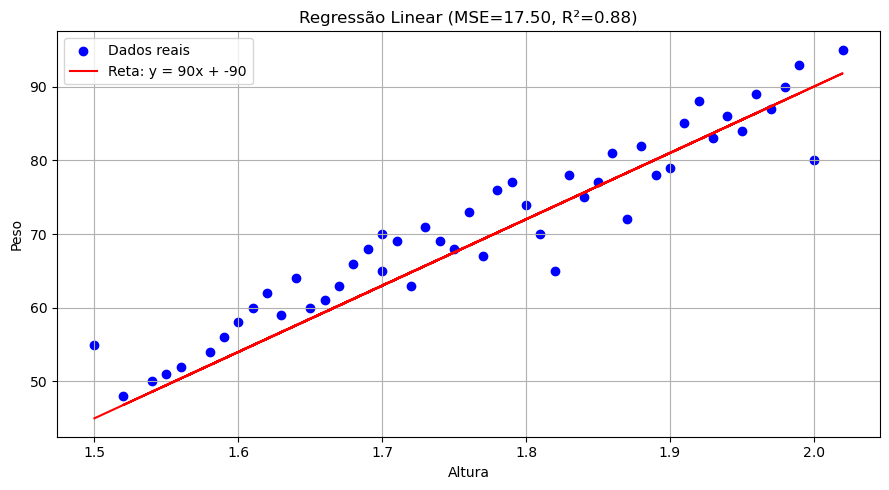

In [8]:
# REGRESSÃO LINEAR #

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Alturas em metros
x = np.array([
    1.50, 1.55, 1.60, 1.62, 1.65, 1.68, 1.70, 1.72, 1.75, 1.78,
    1.80, 1.82, 1.85, 1.88, 1.90, 1.92, 1.95, 1.98, 2.00, 2.02,
    1.58, 1.64, 1.71, 1.77, 1.83, 1.87, 1.91, 1.97, 1.66, 1.73,
    1.52, 1.59, 1.67, 1.74, 1.81, 1.86, 1.93, 1.99, 1.56, 1.63,
    1.70, 1.76, 1.84, 1.89, 1.94, 1.96, 1.54, 1.61, 1.69, 1.79
])

# Pesos em kg
y = np.array([
    55, 51, 58, 62, 60, 66, 70, 63, 68, 76,  
    74, 65, 77, 82, 79, 88, 84, 90, 80, 95,
    54, 64, 69, 67, 78, 72, 85, 87, 61, 71,  
    48, 56, 63, 69, 70, 81, 83, 93, 52, 59,  
    65, 73, 75, 78, 86, 89, 50, 60, 68, 77   
]) 

# Coeficientes da reta
a = 90      # coeficiente angular
b = -90   # coeficiente linear

# Regressão linear
y_pred = a * x + b

# métricas de avaliação
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}") 
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}") 

# Plotando
plt.figure(figsize=(9, 5))
plt.scatter(x, y, label='Dados reais', color='blue')
plt.plot(x, y_pred, color='red', label=f'Reta: y = {a}x + {b}')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title(f'Regressão Linear (MSE={mse:.2f}, R²={r2:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
#  #

In [9]:
# Prova real

def estimar_peso(altura):
    return a * altura + b

altura_input = float(input("Altura: "))
peso_previsto = estimar_peso(altura_input)
print(f"Peso estimado: {peso_previsto:.2f} kg")

Altura:  1.85


Peso estimado: 76.50 kg


In [12]:
# GRID SEARCH #

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

# Alturas em metros
x = np.array([
    1.50, 1.55, 1.60, 1.62, 1.65, 1.68, 1.70, 1.72, 1.75, 1.78,
    1.80, 1.82, 1.85, 1.88, 1.90, 1.92, 1.95, 1.98, 2.00, 2.02,
    1.58, 1.64, 1.71, 1.77, 1.83, 1.87, 1.91, 1.97, 1.66, 1.73,
    1.52, 1.59, 1.67, 1.74, 1.81, 1.86, 1.93, 1.99, 1.56, 1.63,
    1.70, 1.76, 1.84, 1.89, 1.94, 1.96, 1.54, 1.61, 1.69, 1.79
])

# Pesos em kg
y = np.array([
    55, 51, 58, 62, 60, 66, 70, 63, 68, 76,
    74, 65, 77, 82, 79, 88, 84, 90, 80, 95,
    54, 64, 69, 67, 78, 72, 85, 87, 61, 71, 
    48, 56, 63, 69, 70, 81, 83, 93, 52, 59, 
    65, 73, 75, 78, 86, 89, 50, 60, 68, 77   
])

# Grid Search para encontrar os melhores coeficientes
best_mse = float('inf')
best_a = None
best_b = None

# Faixas de busca para a (inclinação) e b (intercept)
a_values = np.linspace(-200, 200, 1000) #
b_values = np.linspace(-200, 200, 1000) #

for a in a_values:
    for b in b_values:
        y_pred = a * x + b
        mse = mean_squared_error(y, y_pred)
        if mse < best_mse:
            best_mse = mse
            best_a = a
            best_b = b

# Melhor predição encontrada
y_best = best_a * x + best_b
r2 = r2_score(y, y_best)
rmse = np.sqrt(best_mse) 

print(f"Melhor coeficiente angular: {best_a:.4f}")
print(f"Melhor coeficiente linear: {best_b:.4f}")
print(f"MSE: {best_mse:.4f}")
print(f"RMSE: {rmse:.4f}")       
print(f"R²: {r2:.4f}")

# Plotando o resultado
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Dados', color='blue')
plt.plot(x, y_best, color='red', label=f'Reta: y = {best_a:.2f}x + {best_b:.2f}')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title(f'Regressão Linear otimizada com Grid Search (MSE={best_mse:.2f}, R²={r2:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# GRID SEARCH #

KeyboardInterrupt: 

Melhor coeficiente angular: 82.1181
Melhor coeficiente linear: -74.1713
MSE: 12.0297
RMSE: 3.4684
R²: 0.9161


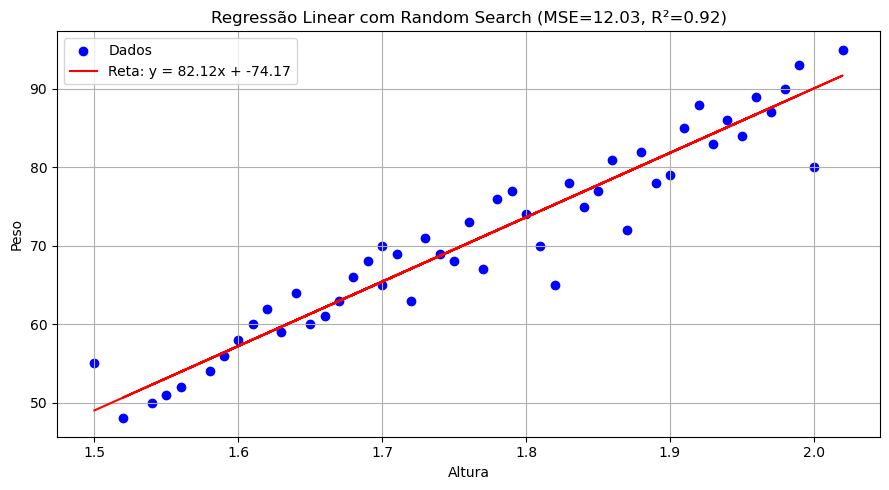

In [17]:
# RANDOM SEARCH #

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Alturas em metros
x = np.array([
    1.50, 1.55, 1.60, 1.62, 1.65, 1.68, 1.70, 1.72, 1.75, 1.78,
    1.80, 1.82, 1.85, 1.88, 1.90, 1.92, 1.95, 1.98, 2.00, 2.02,
    1.58, 1.64, 1.71, 1.77, 1.83, 1.87, 1.91, 1.97, 1.66, 1.73,
    1.52, 1.59, 1.67, 1.74, 1.81, 1.86, 1.93, 1.99, 1.56, 1.63,
    1.70, 1.76, 1.84, 1.89, 1.94, 1.96, 1.54, 1.61, 1.69, 1.79
])

# Pesos em kg
y = np.array([
    55, 51, 58, 62, 60, 66, 70, 63, 68, 76,
    74, 65, 77, 82, 79, 88, 84, 90, 80, 95,
    54, 64, 69, 67, 78, 72, 85, 87, 61, 71, 
    48, 56, 63, 69, 70, 81, 83, 93, 52, 59, 
    65, 73, 75, 78, 86, 89, 50, 60, 68, 77   
])

# Random Search
best_mse = float('inf')
best_a = None
best_b = None

n_iter = 100000  #  
a_range = (-200, 200)
b_range = (-200, 200)

np.random.seed(42)

for _ in range(n_iter):
    a = np.random.uniform(*a_range)
    b = np.random.uniform(*b_range)
    y_pred = a * x + b
    mse = mean_squared_error(y, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_a = a
        best_b = b

# Melhor predição
y_best = best_a * x + best_b
r2 = r2_score(y, y_best)
rmse = np.sqrt(best_mse)

print(f"Melhor coeficiente angular: {best_a:.4f}")
print(f"Melhor coeficiente linear: {best_b:.4f}")
print(f"MSE: {best_mse:.4f}")
print(f"RMSE: {rmse:.4f}") 
print(f"R²: {r2:.4f}")

# Plot
plt.figure(figsize=(9, 5))
plt.scatter(x, y, label='Dados', color='blue')
plt.plot(x, y_best, color='red', label=f'Reta: y = {best_a:.2f}x + {best_b:.2f}')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title(f'Regressão Linear com Random Search (MSE={best_mse:.2f}, R²={r2:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
# RANDOM SEARCH #

Melhor coeficiente angular: 79.9924
Melhor coeficiente linear: -70.4425
MSE: 11.9361
RMSE: 3.4549
R²: 0.9168


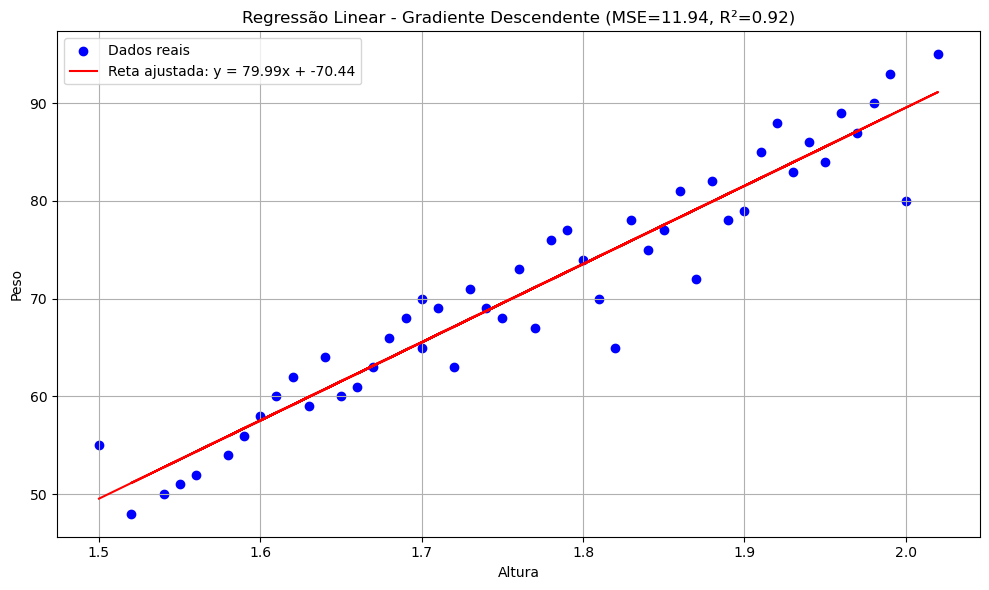

In [21]:
# GRADIENTE DESCENDENTE #

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Dados
x = np.array([
    1.50, 1.55, 1.60, 1.62, 1.65, 1.68, 1.70, 1.72, 1.75, 1.78,
    1.80, 1.82, 1.85, 1.88, 1.90, 1.92, 1.95, 1.98, 2.00, 2.02,
    1.58, 1.64, 1.71, 1.77, 1.83, 1.87, 1.91, 1.97, 1.66, 1.73,
    1.52, 1.59, 1.67, 1.74, 1.81, 1.86, 1.93, 1.99, 1.56, 1.63,
    1.70, 1.76, 1.84, 1.89, 1.94, 1.96, 1.54, 1.61, 1.69, 1.79
])

# Pesos em kg
y = np.array([
    55, 51, 58, 62, 60, 66, 70, 63, 68, 76,
    74, 65, 77, 82, 79, 88, 84, 90, 80, 95,
    54, 64, 69, 67, 78, 72, 85, 87, 61, 71, 
    48, 56, 63, 69, 70, 81, 83, 93, 52, 59, 
    65, 73, 75, 78, 86, 89, 50, 60, 68, 77   
])

# Inicialização dos parâmetros
a = 0.0  # inclinação
b = 0.0  # intercept
lr = 0.1  # taxa de aprendizado
epochs = 100000  # 
n = len(x) # amostras

# Gradiente Descendente
for i in range(epochs):
    y_pred = a * x + b
    error = y - y_pred
    grad_a = (-2/n) * np.dot(x, error)
    grad_b = (-2/n) * np.sum(error)
    a -= lr * grad_a
    b -= lr * grad_b

# Predição final
y_final = a * x + b
mse = mean_squared_error(y, y_final)
r2 = r2_score(y, y_final)
rmse = np.sqrt(mse)

# Resultados
print(f"Melhor coeficiente angular: {a:.4f}")
print(f"Melhor coeficiente linear: {b:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Dados reais')
plt.plot(x, y_final, color='red', label=f'Reta ajustada: y = {a:.2f}x + {b:.2f}')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title(f'Regressão Linear - Gradiente Descendente (MSE={mse:.2f}, R²={r2:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show();
# GRADIENTE DESCENDENTE #

Melhor coeficiente angular: 81.1655
Melhor coeficiente linear: -72.9167
MSE: 12.1251
RMSE: 3.4821
R²: 0.9154


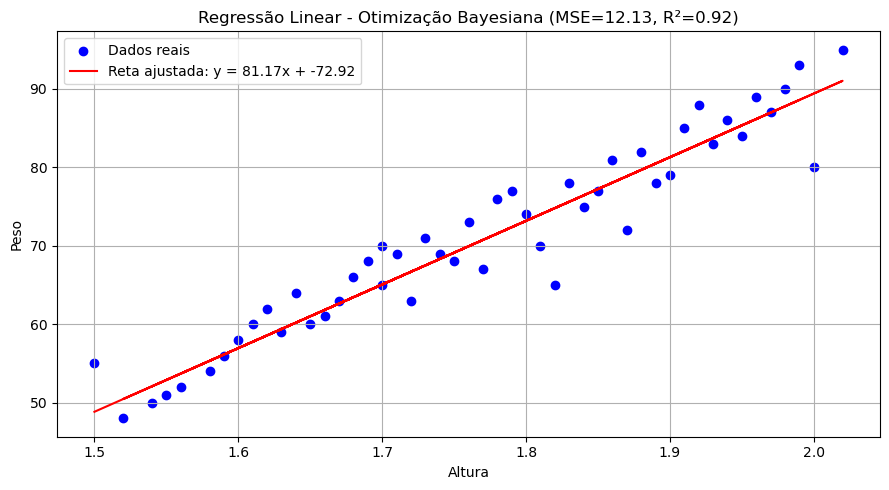

In [23]:
# MÉTODO BAYESIANO #

import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from skopt import gp_minimize
from skopt.space import Real
import matplotlib.pyplot as plt

# Alturas em metros
x = np.array([
    1.50, 1.55, 1.60, 1.62, 1.65, 1.68, 1.70, 1.72, 1.75, 1.78,
    1.80, 1.82, 1.85, 1.88, 1.90, 1.92, 1.95, 1.98, 2.00, 2.02,
    1.58, 1.64, 1.71, 1.77, 1.83, 1.87, 1.91, 1.97, 1.66, 1.73,
    1.52, 1.59, 1.67, 1.74, 1.81, 1.86, 1.93, 1.99, 1.56, 1.63,
    1.70, 1.76, 1.84, 1.89, 1.94, 1.96, 1.54, 1.61, 1.69, 1.79
])

# Pesos em kg
y = np.array([
    55, 51, 58, 62, 60, 66, 70, 63, 68, 76,
    74, 65, 77, 82, 79, 88, 84, 90, 80, 95,
    54, 64, 69, 67, 78, 72, 85, 87, 61, 71, 
    48, 56, 63, 69, 70, 81, 83, 93, 52, 59, 
    65, 73, 75, 78, 86, 89, 50, 60, 68, 77   
])

# Função a minimizar (MSE)
def objective(params):
    a, b = params
    y_pred = a * x + b
    return mean_squared_error(y, y_pred)

# Espaço de busca dos parâmetros a e b
space = [
    Real(-200, 200, name='a'),   # Coeficiente angular
    Real(-200, 200, name='b')    # Coeficiente linear
]

# Rodando a otimização bayesiana
result = gp_minimize(
    func=objective,
    dimensions=space,
    n_calls=50,  #   
    random_state=42,
    verbose=False
)

# Resultados
best_a, best_b = result.x
y_pred = best_a * x + best_b
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y, y_pred)

# Impressão dos resultados
print(f"Melhor coeficiente angular: {best_a:.4f}")
print(f"Melhor coeficiente linear: {best_b:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

# Plot da reta ajustada
plt.figure(figsize=(9, 5))
plt.scatter(x, y, label='Dados reais', color='blue')
plt.plot(x, y_pred, color='red', label=f'Reta ajustada: y = {best_a:.2f}x + {best_b:.2f}')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.title(f'Regressão Linear - Otimização Bayesiana (MSE={mse:.2f}, R²={r2:.2f})')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# REGRESSÃO LINEAR MÚLTIPLA #

import kagglehub

path = kagglehub.dataset_download("victorstein/casas-venda-ponta-grossa-pr")

print("Path to dataset files:", path)

In [24]:
# Configurações

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Configuração de exibição
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.1f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
sns.set(style="whitegrid")

# Caminho do arquivo
caminho_arquivo = r"C:\Users\i32971\.cache\kagglehub\datasets\victorstein\casas-venda-ponta-grossa-pr\versions\1\casas_ponta_grossa.csv"

# Carregar os dados
dados = pd.read_csv(caminho_arquivo, thousands=',')

# Visualizar os dados crus
display(dados)

,Referência,Quartos,Banheiros,Suítes,Vagas de Garagem,Bairro,Área Total,Valor Venda
0,132860-4,"3,0","2,0","0,0","2,0",Uvaranas,"164,0","430.000,0"
1,148460-4,"3,0","2,0","1,0","3,0",Jardim Carvalho,NaN,"350.000,0"
2,154166-4,"3,0","1,0","1,0","1,0",Oficinas,NaN,"300.000,0"
3,146507-4,"3,0","2,0","1,0","2,0",Uvaranas,"80,0","169.900,0"
4,154050-4,"2,0","1,0","0,0","1,0",Uvaranas,NaN,"165.000,0"
...,...,...,...,...,...,...,...,...
3571,131553-4,"3,0","3,0","1,0","2,0",Nova Rússia,NaN,"700.000,0"
3572,106906-4,"3,0","5,0","2,0","2,0",Uvaranas,"314,0","700.000,0"
3573,130057-4,"3,0","3,0","0,0",NaN,Estrela,"200,0","700.000,0"
3574,81553-4,"4,0","3,0","1,0","2,0",Nova Rússia,"400,0","700.000,0"


In [25]:
# EDA
display(Markdown("## Estatísticas descritivas"))
display(dados.describe())

# Verificar valores ausentes
display(Markdown("## Valores ausentes"))
valores_nulos = dados.isnull().sum().to_frame(name='Total Nulos')
valores_nulos['% Nulos'] = (valores_nulos['Total Nulos'] / len(dados) * 100).round(2)
display(valores_nulos[valores_nulos['Total Nulos'] > 0])

# Verificar outliers com Z-Score
display(Markdown("## Análise de Outliers com Z-Score (> 3)"))
colunas_numericas = dados.select_dtypes(include=['int64', 'float64']).columns
z_scores = pd.DataFrame()
for col in colunas_numericas:
    z_scores[col] = stats.zscore(dados[col].dropna())
outliers = (abs(z_scores) > 3).sum().to_frame(name='Número de Outliers')
outliers['% Outliers'] = (outliers['Número de Outliers'] / len(dados) * 100).round(2)
display(outliers)

## Estatísticas descritivas

,Quartos,Banheiros,Suítes,Vagas de Garagem,Área Total,Valor Venda
count,"3.214,0","2.994,0","3.576,0","2.329,0","2.756,0","3.573,0"
mean,"3,0","2,1","0,7","2,2","230,5","585.137,8"
std,"0,8","1,3","1,0","1,2","271,4","615.907,7"
min,"1,0","1,0","0,0","1,0","24,0","48.770,0"
25%,"3,0","1,0","0,0","1,0","93,0","198.000,0"
50%,"3,0","2,0","0,0","2,0","167,0","362.500,0"
75%,"3,0","3,0","1,0","3,0","300,0","750.000,0"
max,"9,0","8,0","7,0","10,0","10.000,0","5.200.000,0"


## Valores ausentes

,Total Nulos,% Nulos
Quartos,362,"10,1"
Banheiros,582,"16,3"
Vagas de Garagem,1247,"34,9"
Área Total,820,"22,9"
Valor Venda,3,"0,1"


## Análise de Outliers com Z-Score (> 3)

,Número de Outliers,% Outliers
Quartos,29,"0,8"
Banheiros,67,"1,9"
Suítes,92,"2,6"
Vagas de Garagem,51,"1,4"
Área Total,12,"0,3"
Valor Venda,71,"2,0"


## Correlação de Pearson entre variáveis numéricas

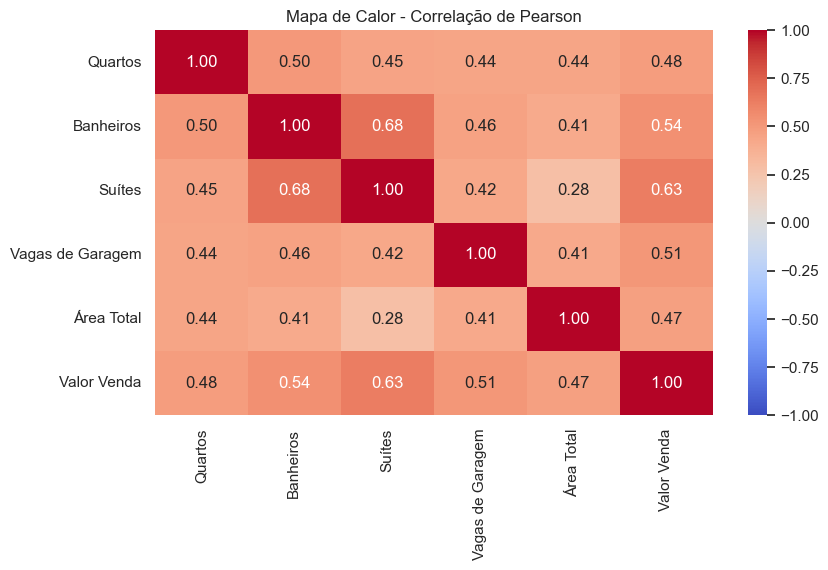

In [26]:
# Correlação de Pearson

display(Markdown("## Correlação de Pearson entre variáveis numéricas"))
correlacao_pearson = dados[colunas_numericas].corr(method='pearson')
plt.figure(figsize=(9, 5))
sns.heatmap(correlacao_pearson, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de Calor - Correlação de Pearson')
plt.show()

In [27]:
# Tratamento e limpeza dos dados

# Remover coluna irrelevante
dados = dados.drop(columns=["Referência"])

# Preencher nulos com mediana
dados[colunas_numericas] = dados[colunas_numericas].fillna(dados[colunas_numericas].median())

# One-hot encoding nos bairros
dados = pd.get_dummies(dados, columns=["Bairro"], drop_first=True)

# Visualizar dados tratados
display(dados)

,Quartos,Banheiros,Suítes,Vagas de Garagem,Área Total,Valor Venda,Bairro_ Cará-cará,Bairro_ Centro,Bairro_ Chapada,Bairro_ Colônia Dona Luiza,Bairro_ Contorno / Sta. Paula,Bairro_ Estrela,Bairro_ Jardim Carvalho,Bairro_ Neves,Bairro_ Nova Rússia,Bairro_ Oficinas,Bairro_ Olarias,Bairro_ Orfãs,Bairro_ Periquitos,Bairro_ Ronda,Bairro_ Uvaranas
0,"3,0","2,0","0,0","2,0","164,0","430.000,0",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,"3,0","2,0","1,0","3,0","167,0","350.000,0",False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
2,"3,0","1,0","1,0","1,0","167,0","300.000,0",False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,"3,0","2,0","1,0","2,0","80,0","169.900,0",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,"2,0","1,0","0,0","1,0","167,0","165.000,0",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,"3,0","3,0","1,0","2,0","167,0","700.000,0",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3572,"3,0","5,0","2,0","2,0","314,0","700.000,0",False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3573,"3,0","3,0","0,0","2,0","200,0","700.000,0",False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3574,"4,0","3,0","1,0","2,0","400,0","700.000,0",False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [30]:
# Treinamento e avaliação

# Separando features e target
X = dados.drop(columns=["Valor Venda"]) 
y = dados["Valor Venda"]  

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instanciando o modelo de Regressão Linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Predições nos dados de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Resultados
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 181297518324.6526
RMSE: 425790.4629
R²: 0.5126


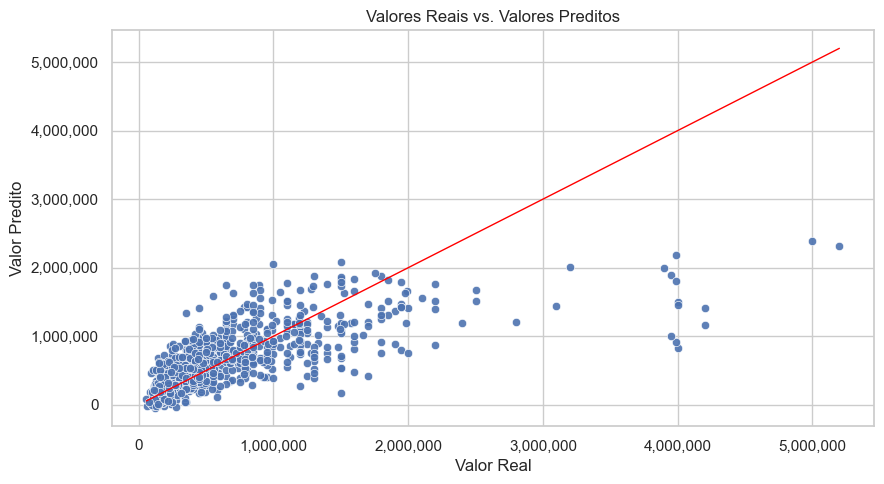

In [29]:
# Avaliação visual

plt.figure(figsize=(9, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.9) 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=1)

# Formatadores para mostrar números com separador de milhar
import matplotlib.ticker as mtick
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Valores Reais vs. Valores Preditos")
plt.tight_layout()
plt.show()
# REGRESSÃO LINEAR MÚLTIPLA #

R²: 0.56
RMSE: R$ 421,639.06


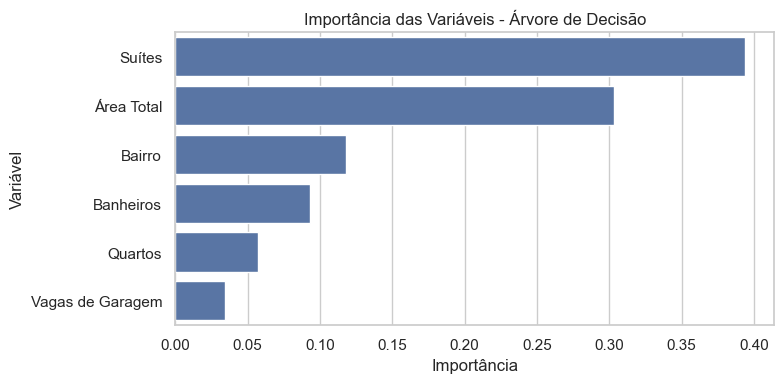


KeyboardInterrupt



In [32]:
# DECISION TREE #

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Caminho do arquivo
caminho_arquivo = r"C:\Users\i32971\.cache\kagglehub\datasets\victorstein\casas-venda-ponta-grossa-pr\versions\1\casas_ponta_grossa.csv"

# Carregar os dados
df = pd.read_csv(caminho_arquivo, thousands=',')

# Remover coluna não relevante
df = df.drop(columns=["Referência"])

# Codificar o bairro
le_bairro = LabelEncoder()
df["Bairro"] = le_bairro.fit_transform(df["Bairro"].astype(str))

# valores ausentes
df[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].median())
#df = df.dropna()

# Separar X e y
X = df.drop(columns=["Valor Venda"])
y = df["Valor Venda"]

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar modelo de árvore de decisão
modelo_arvore = DecisionTreeRegressor(random_state=42)
modelo_arvore.fit(X_train, y_train)

# Previsões
y_pred = modelo_arvore.predict(X_test)

# Avaliação
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.2f}")
print(f"RMSE: R$ {rmse:,.2f}")

# Importância das variáveis
importancias = pd.Series(modelo_arvore.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualização da importância das variáveis
plt.figure(figsize=(8,4))
sns.barplot(x=importancias, y=importancias.index)
plt.title("Importância das Variáveis - Árvore de Decisão")
plt.xlabel("Importância")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()

# Plota a árvore de decisão
plt.figure(figsize=(22, 15))
plot_tree(modelo_arvore, feature_names=X.columns, filled=True, fontsize=10, rounded=True)#, max_depth=3)
plt.title("Árvore de Decisão")
plt.show()

R²: 0.65
RMSE: R$ 377,824.29


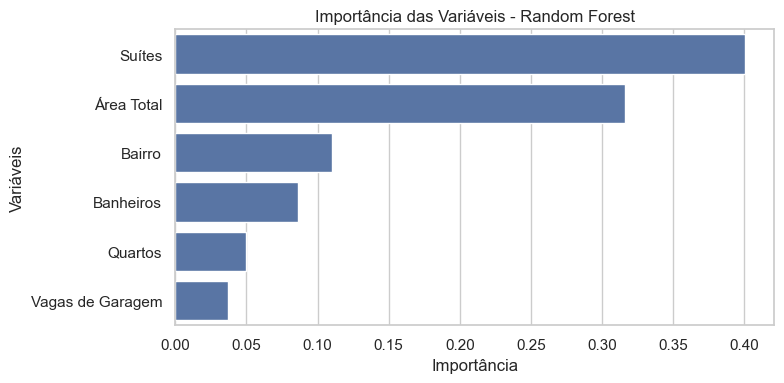

In [33]:
#RANDOM FOREST

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Caminho do arquivo
caminho_arquivo = r"C:\Users\i32971\.cache\kagglehub\datasets\victorstein\casas-venda-ponta-grossa-pr\versions\1\casas_ponta_grossa.csv"

# Carregar os dados
df = pd.read_csv(caminho_arquivo, thousands=',')

# Remover colunas que não são úteis para o modelo
df = df.drop(columns=["Referência"])

# Codificar a variável categórica "Bairro"
le_bairro = LabelEncoder()
df["Bairro"] = le_bairro.fit_transform(df["Bairro"].astype(str))

# valores ausentes
df[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].median())
#df = df.dropna()

# Separar variáveis independentes (X) e alvo (y)
X = df.drop(columns=["Valor Venda"])
y = df["Valor Venda"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo_rf.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.2f}")
print(f"RMSE: R$ {rmse:,.2f}")

# Importância das variáveis
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualizar as variáveis mais importantes
plt.figure(figsize=(8,4))
sns.barplot(x=importancias, y=importancias.index)
plt.title("Importância das Variáveis - Random Forest")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

#RANDOM FOREST

R²: 0.66
RMSE: R$ 370,821.63


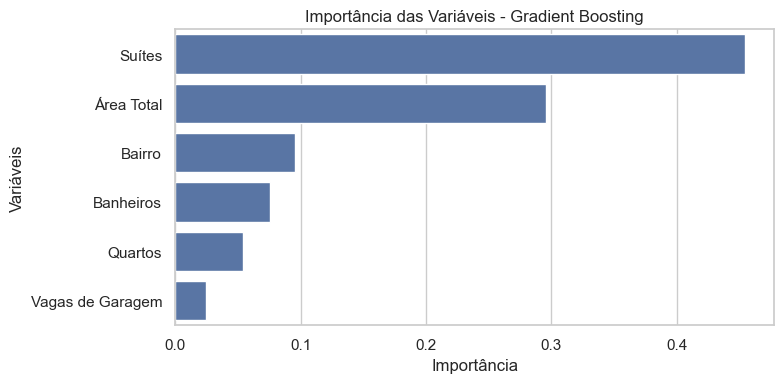

In [34]:
# GRADIENT BOOSTING #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Caminho do arquivo
caminho_arquivo = r"C:\Users\i32971\.cache\kagglehub\datasets\victorstein\casas-venda-ponta-grossa-pr\versions\1\casas_ponta_grossa.csv"

# Carregar os dados
df = pd.read_csv(caminho_arquivo, thousands=',')

# Remover colunas que não são úteis para o modelo
df = df.drop(columns=["Referência"])

# Codificar a variável categórica "Bairro"
le_bairro = LabelEncoder()
df["Bairro"] = le_bairro.fit_transform(df["Bairro"].astype(str))

#  valores ausentes
df[colunas_numericas] = df[colunas_numericas].fillna(df[colunas_numericas].median())
#df = df.dropna()

# Separar variáveis independentes (X) e alvo (y)
X = df.drop(columns=["Valor Venda"])
y = df["Valor Venda"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Gradient Boosting
modelo_gb = GradientBoostingRegressor(
    n_estimators=200,   # Mais árvores pode ajudar no desempenho
    learning_rate=0.1,  # Taxa de aprendizado (padrão é 0.1)
    max_depth=3,        # Profundidade das árvores (evita overfitting)
    random_state=42
)
modelo_gb.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo_gb.predict(X_test)

# Avaliar o modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.2f}")
print(f"RMSE: R$ {rmse:,.2f}")

# Importância das variáveis
importancias = pd.Series(modelo_gb.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualizar as variáveis mais importantes
plt.figure(figsize=(8,4))
sns.barplot(x=importancias, y=importancias.index)
plt.title("Importância das Variáveis - Gradient Boosting")
plt.xlabel("Importância")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()
# GRADIENT BOOSTING #